# Regression

## Linear Data

## Non-Linear Data

### Polynomial Regression

- transfer the X data: Treat the n-degree (n >1), as a new feature

- fit the transferred data in the linear regression. 

In [3]:
import numpy as np

# Data Creation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print (lin_reg.intercept_, lin_reg.coef_)

[ 1.80301482] [[ 1.03065642  0.57175762]]


## Regularized Linear Models

### Ridge Regression

In [28]:
import numpy as np

# Data Creation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.linear_model import Ridge, SGDRegressor

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.59157204])

## Evaluation

### Learning Curve

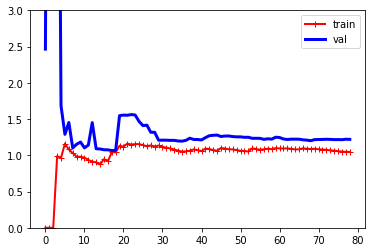

In [25]:
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y): 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)): 
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    plt.ylim(0, 3)
    plt.legend()


import numpy as np
import matplotlib.pyplot as plt

# Data Creation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# # non-pipeline version 
# poly_features = PolynomialFeatures(degree = 10, include_bias = False)
# X_poly = poly_features.fit_transform(X)
# lin_reg = LinearRegression()
# plot_learning_curves(lin_reg, X, y)

# pipeline version
# Note: Need to limit the y axis min and max range
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree = 2, include_bias = False)), 
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

